In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
superpopulation_code_colors = ['#D9EDF8', '#FFADAD', '#E4F1EE', '#FFD6A5', '#DEDAF4', '#FDFFB6']

superpopulation_code_dict = {
    'EUR': 0,
    'EAS': 1,
    'AMR': 2,
    'SAS': 3,
    'AFR': 4,
    'EUR,AFR': 5,
}

In [6]:
from my_knn_module.import_data import import_genome_data_as_df

In [4]:
real_df = import_genome_data_as_df(superpopulation_code_dict=superpopulation_code_dict)

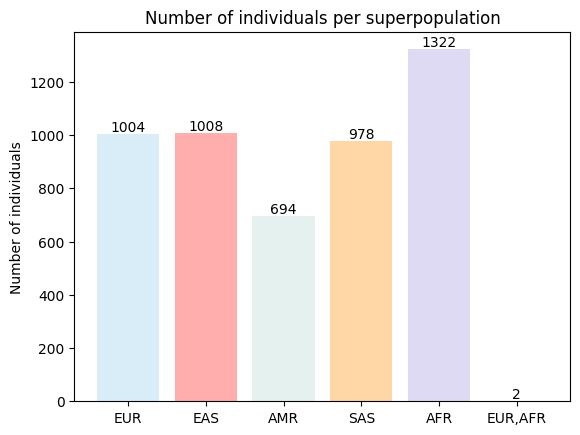

In [5]:
fig, ax = plt.subplots()

individual_per_pop = []
pop_names = ["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"]
for i in range(6):
    individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])

bars = ax.bar(pop_names, height=individual_per_pop, color=superpopulation_code_colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per superpopulation')

plt.show()

In [6]:
real_df = real_df[real_df["Superpopulation code"] != 5]

def superpopulation_all_same():
    individual_per_pop = []
    for i in range(5):
        individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])
    return all(i == individual_per_pop[0] for i in individual_per_pop)

def min_superpop():
    individual_per_pop = []
    for i in range(5):
        individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])
    return [idx for idx, value in enumerate(individual_per_pop) if value == min(individual_per_pop)]

i = 0
while not(superpopulation_all_same()):
    row_to_remove = real_df.sample(1)
    if all(i != row_to_remove.iloc[0]["Superpopulation code"] for i in min_superpop()):
        real_df = real_df[real_df["Sample"] != row_to_remove.iloc[0]["Sample"]]
        i += 1
        print("Removed ", i, " values.")

Removed  1  values.
Removed  2  values.
Removed  3  values.
Removed  4  values.
Removed  5  values.
Removed  6  values.
Removed  7  values.
Removed  8  values.
Removed  9  values.
Removed  10  values.
Removed  11  values.
Removed  12  values.
Removed  13  values.
Removed  14  values.
Removed  15  values.
Removed  16  values.
Removed  17  values.
Removed  18  values.
Removed  19  values.
Removed  20  values.
Removed  21  values.
Removed  22  values.
Removed  23  values.
Removed  24  values.
Removed  25  values.
Removed  26  values.
Removed  27  values.
Removed  28  values.
Removed  29  values.
Removed  30  values.
Removed  31  values.
Removed  32  values.
Removed  33  values.
Removed  34  values.
Removed  35  values.
Removed  36  values.
Removed  37  values.
Removed  38  values.
Removed  39  values.
Removed  40  values.
Removed  41  values.
Removed  42  values.
Removed  43  values.
Removed  44  values.
Removed  45  values.
Removed  46  values.
Removed  47  values.
Removed  48  values.
R

In [7]:
real_df.to_csv("./generated/REAL_same_amount.csv", sep=" ", na_rep='', index=False)
real_df.head()

,Type,Sample,0,1,2,3,4,5,6,7,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Superpopulation code
2,Real,HG00097,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Real,HG00097,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Real,HG00099,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Real,HG00099,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Real,HG00100,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
real_df = pd.read_csv('./generated/' + 'REAL_same_amount.csv', delimiter = ' ')
real_df.head()

,Type,Sample,0,1,2,3,4,5,6,7,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Superpopulation code
0,Real,HG00097,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Real,HG00097,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Real,HG00099,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Real,HG00099,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Real,HG00100,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


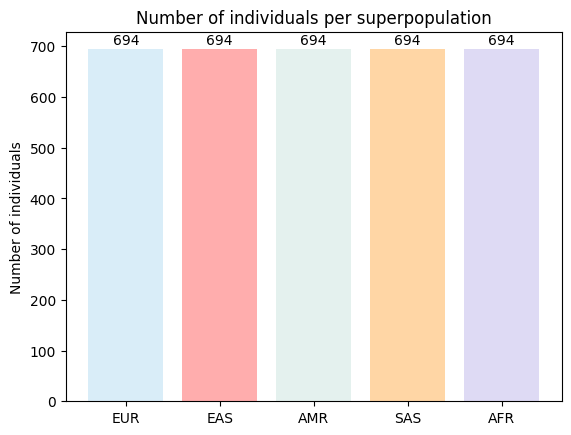

In [7]:
fig, ax = plt.subplots()

individual_per_pop = []
pop_names = ["EUR", "EAS", "AMR", "SAS", "AFR"]
for i in range(5):
    individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])

bars = ax.bar(pop_names, height=individual_per_pop, color=superpopulation_code_colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per superpopulation')

plt.show()

In [8]:
NUMBER_OF_NEIGHBORS = 6
MODEL = KNeighborsClassifier

In [9]:
X = real_df.iloc[:, 3:10002]
y = np.ravel(real_df.iloc[:, 10002:10003])
knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

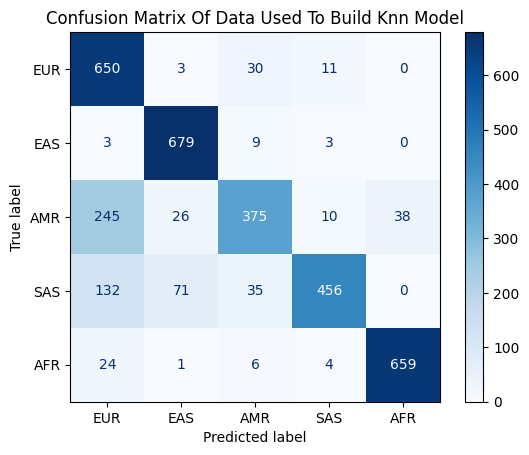

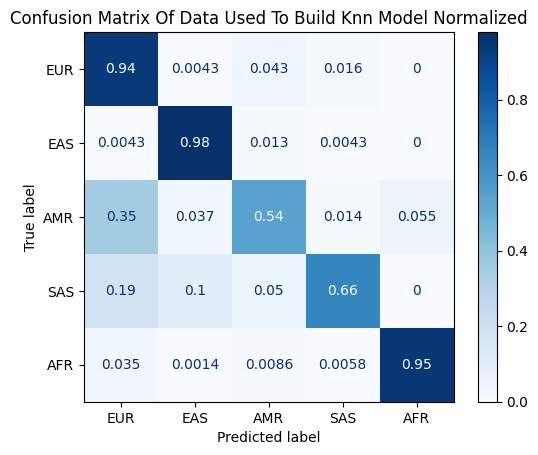

0.8123919308357349


In [10]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model Normalized")

plt.show()

print(knn_model.score(X, y))

In [11]:
test_sample = import_genome_data_as_df().reset_index(drop=True)
test_sample = test_sample[test_sample["Superpopulation code"] != 5]
test_sample_input = test_sample.iloc[:, 3:10002]
test_sample_real = np.ravel(test_sample.iloc[:, 10002:10003])
test_predictions = knn_model.predict(test_sample_input)

In [13]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of All Data")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of All Data Normalized")

plt.show()
print(knn_model.score(test_sample_input, test_sample_real))

: 

In [ ]:
ag_df = import_genome_data_as_df(filename='WGAN.hapt', labels=None)

ag_preds = knn_model.predict(ag_df.iloc[:, 3:10002])

ag_df["Superpopulation code"] = ag_preds

superpopulation_code_dict = {
    0 : 'EUR',
    1 : 'EAS',
    2 : 'AMR',
    3 : 'SAS',
    4 : 'AFR',
    5 : 'EUR,AFR',
}

superpopulation_code_colors = ['#D9EDF8', '#FFADAD', '#E4F1EE', '#FFD6A5', '#DEDAF4', '#FDFFB6']

fig, ax = plt.subplots()

individual_per_pop = []
pop_names = ["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"]
for i in range(6):
    individual_per_pop.append(ag_df[ag_df['Superpopulation code'] == i].shape[0])

bars = ax.bar(pop_names, height=individual_per_pop, color=superpopulation_code_colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per superpopulation')

plt.show()

ag_df["Superpopulation code"].replace(superpopulation_code_dict, inplace=True)

ag_df.head()